In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df_s1 = pandas.read_csv('20L1024N50D_relu_0807_s1.log')

In [24]:
#df_s1p2 = pandas.read_csv('20L1024N50D_relu_0723_s1p2.log')
#df = df_s1.append(df_s1p2, ignore_index=True)
df = pandas.read_csv('20L1024N50D_relu_0807_s1.log')
df.tail(n=10)

,epoch,Le,Ljet,Lmu,acc,loss,sLe,sLjet,sLmu,val_Le,val_Ljet,val_Lmu,val_acc,val_loss,val_sLe,val_sLjet,val_sLmu
1190,1190,0.156202,0.138272,0.017102,0.939973,0.461711,0.156202,0.171473,0.134036,0.214205,0.225089,0.022729,0.934229,0.671478,0.214205,0.279137,0.178137
1191,1191,0.151748,0.146183,0.018916,0.940569,0.481290,0.151748,0.181284,0.148258,0.160653,0.124512,0.022198,0.940844,0.489037,0.160653,0.154409,0.173975
1192,1192,0.163541,0.141353,0.020019,0.939209,0.495727,0.163541,0.175295,0.156896,0.162753,0.137397,0.023266,0.943390,0.515491,0.162753,0.170388,0.182349
1193,1193,0.160783,0.142739,0.018970,0.939326,0.486474,0.160783,0.177014,0.148678,0.221503,0.143736,0.028478,0.940730,0.622951,0.221503,0.178249,0.223199
1194,1194,0.148910,0.142664,0.021191,0.937470,0.491911,0.148910,0.176921,0.166082,0.232281,0.204520,0.052492,0.930907,0.897319,0.232281,0.253629,0.411409
1195,1195,0.155055,0.146473,0.017716,0.939898,0.475544,0.155055,0.181644,0.138846,0.148048,0.123327,0.032670,0.942494,0.557038,0.148048,0.152940,0.256051
1196,1196,0.154781,0.140441,0.017236,0.940341,0.464033,0.154781,0.174164,0.135088,0.456550,0.361571,0.077059,0.837176,1.508887,0.456550,0.448391,0.603947
1197,1197,0.154592,0.148951,0.018547,0.938794,0.484667,0.154592,0.184716,0.145358,0.176809,0.142763,0.031016,0.948618,0.596940,0.176809,0.177043,0.243088
1198,1198,0.165565,0.136201,0.016908,0.940406,0.466987,0.165565,0.168905,0.132518,0.154491,0.175336,0.025139,0.943545,0.568955,0.154491,0.217437,0.197028
1199,1199,0.157344,0.142272,0.016783,0.940177,0.465316,0.157344,0.176434,0.131539,0.171229,0.147526,0.017717,0.947704,0.493039,0.171229,0.182950,0.138860


In [5]:
losses = [ ("loss", "Total loss"), ("Le", "Loss tau vs. e"), ("Lmu", "Loss tau vs. mu"), ("Ljet", "Loss tau vs. jet")]
losses_and_acc = losses + [ ("acc", "Accuracy") ]

In [25]:
best_idx = set()
for loss in losses_and_acc:
    loss_name = loss[0]
    val_loss_name = "val_" + loss_name
    if loss_name != "acc":
        idx = df[val_loss_name].idxmin()
    else:
        idx = df[val_loss_name].idxmax()
    best_idx.add(idx)
    print("{: <20}{: <7}{:.6f}".format(loss_name, df.epoch[idx], df[val_loss_name][idx]))
df.iloc[sorted(list(best_idx))]

loss                967    0.407787
Le                  1177   0.140371
Lmu                 967    0.013354
Ljet                954    0.120758
acc                 1049   0.949690


,epoch,Le,Ljet,Lmu,acc,loss,sLe,sLjet,sLmu,val_Le,val_Ljet,val_Lmu,val_acc,val_loss,val_sLe,val_sLjet,val_sLmu
954,954,0.157195,0.144840,0.020058,0.937605,0.488719,0.157195,0.177787,0.153737,0.149358,0.120758,0.028464,0.941982,0.515745,0.149358,0.148227,0.218160
967,967,0.163364,0.150111,0.018964,0.937669,0.494472,0.163364,0.185991,0.145117,0.150152,0.125461,0.013354,0.946660,0.407787,0.150152,0.155449,0.102186
1049,1049,0.167583,0.143856,0.019272,0.939258,0.491809,0.167583,0.182392,0.141835,0.165931,0.140560,0.032680,0.949690,0.584656,0.165931,0.178214,0.240511
1177,1177,0.155840,0.146703,0.017501,0.940077,0.474937,0.155840,0.181929,0.137168,0.140371,0.130810,0.020356,0.943939,0.462133,0.140371,0.162219,0.159543


In [7]:
def std_abs_rel(x, win_size):
    rol = x.rolling(win_size, min_periods=2)
    return rol.std(), rol.std() / rol.mean()

In [8]:
def direction(y, win_size):
    dirs = np.empty(len(y))
    dirs[:] = np.nan
    x = np.arange(win_size)
    y_rol = y.rolling(win_size, min_periods=1).mean()
    for n in range(len(y)):
        first_entry = max(0, n + 1 - win_size)
        n_entries = n - first_entry + 1
        if n_entries > 1:
            p = np.polyfit(x[0:n_entries], y_rol[first_entry:first_entry+n_entries], 1)
            dirs[n] = p[0]
    return dirs

In [26]:
steps_per_epoch = 6
win_size = steps_per_epoch * 20

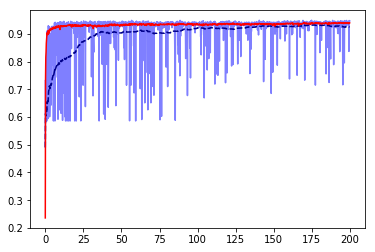

In [27]:
x_values = df.epoch / steps_per_epoch
plt.plot(x_values, df.val_acc, color="blue", alpha=0.5)
plt.plot(x_values, df.val_acc.rolling(win_size, min_periods=1).mean(), color="darkblue", ls="--")
plt.plot(x_values, df.acc, color="red");

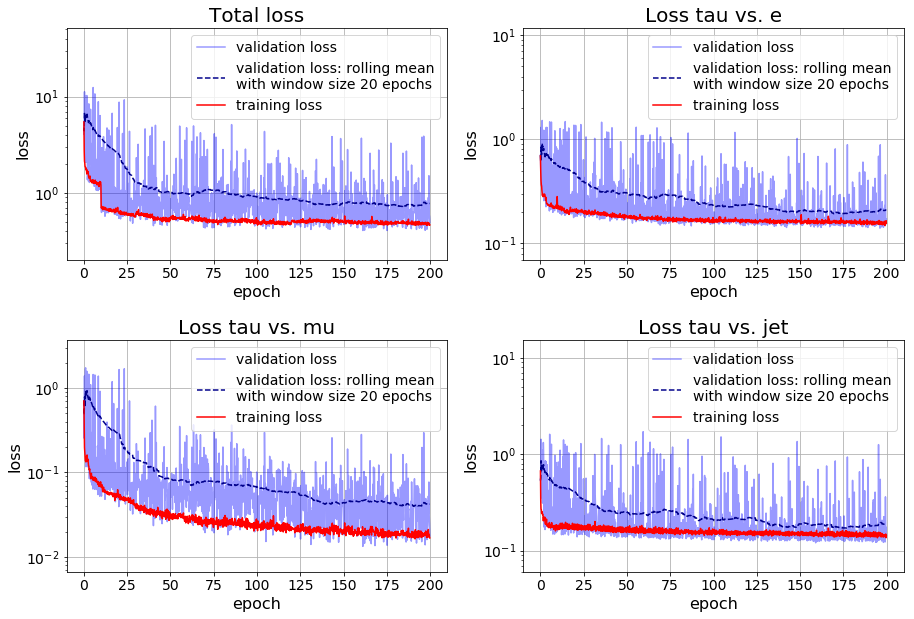

In [28]:
fig, all_ax = plt.subplots(2, 2, figsize=(15,10))
i = 0
x_values = df.epoch / steps_per_epoch
for loss in losses:
    loss_name = loss[0]
    loss_title = loss[1]
    j = int((i - (i % 2)) / 2)
    k = i % 2
    ax = all_ax[j][k]
    val_loss = df["val_" + loss_name]
    val_loss_rol = df["val_" + loss_name].rolling(win_size, min_periods=1).mean()
    train_loss = df[loss_name]
    ax.plot(x_values, val_loss, color="blue", alpha=0.4)
    ax.plot(x_values, val_loss_rol, color="darkblue", ls="--")
    ax.plot(x_values, train_loss, color="red")
    
    n_epoch = df.shape[0]
    half_epoch = int(n_epoch * 0.4)
    right_y_max = np.stack([val_loss[half_epoch:], val_loss_rol[half_epoch:], train_loss[half_epoch:]]).max()
    y_min = np.stack([val_loss, val_loss_rol, train_loss]).min() / 2
    
    ylim = ax.get_ylim()
    y_max = max(ylim[1], right_y_max * 10)
    ax.set_ylim([y_min, y_max])
    ax.legend(["validation loss", "validation loss: rolling mean\nwith window size %d epochs" % (win_size / steps_per_epoch),
               "training loss"], fontsize=14, loc='upper right')
        
    ax.set_title(loss_title, fontsize=20)
    ax.set_ylabel("loss", fontsize=16)
    ax.set_xlabel("epoch", fontsize=16)
    ax.tick_params(labelsize=14, )
    ax.set_yscale('log')
    ax.grid(True)
    
    i += 1
plt.subplots_adjust(hspace=0.35)
plt.show()
fig.savefig("Losses.pdf", bbox_inches='tight')

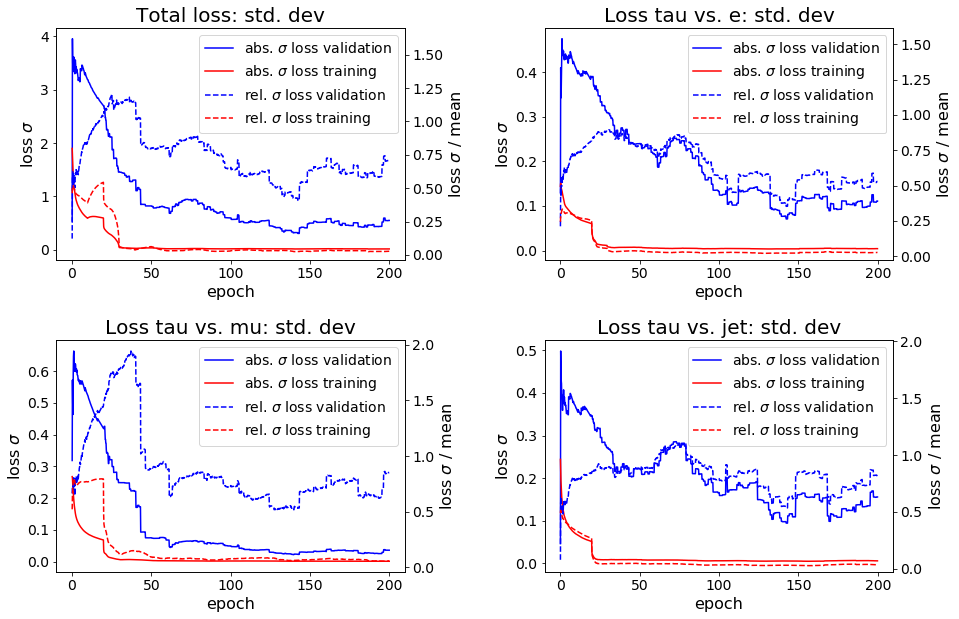

In [29]:
fig, all_ax = plt.subplots(2, 2, figsize=(15,10))
i = 0
for loss in losses:
    loss_name = loss[0]
    loss_title = loss[1]
    j = int((i - (i % 2)) / 2)
    k = i % 2
    ax = all_ax[j][k]
    val_std = std_abs_rel(df["val_" + loss_name], win_size)
    train_std = std_abs_rel(df[loss_name], win_size)
    
    l1 = ax.plot(x_values, val_std[0], color="blue")
    l2 = ax.plot(x_values, train_std[0], color="red")
    
    ax_twin = ax.twinx()
    
    l3 = ax_twin.plot(x_values, val_std[1], color="blue", ls="--")
    l4 = ax_twin.plot(x_values, train_std[1], color="red", ls="--")
    
    n_epoch = df.shape[0]
    half_epoch = int(n_epoch * 0.4)
    right_y_max = np.stack([val_std[0][half_epoch:], train_std[0][half_epoch:]]).max()
    ylim = ax.get_ylim()
    y_max = max(ylim[1], right_y_max * 2)
    ax.set_ylim([ylim[0], y_max])
    
    right_y_max = np.stack([val_std[1][half_epoch:], train_std[1][half_epoch:]]).max()
    ylim = ax_twin.get_ylim()
    y_max = max(ylim[1], right_y_max * 2)
    ax_twin.set_ylim([ylim[0], y_max])

    lines = l1 + l2 + l3 + l4
    ax.legend(lines, ["abs. $\sigma$ loss validation", "abs. $\sigma$ loss training",
                      "rel. $\sigma$ loss validation", "rel. $\sigma$ loss training"], fontsize=14)

    
    ax.set_title(loss_title + ": std. dev", fontsize=20)
    ax.set_ylabel("loss $\sigma$", fontsize=16)
    ax.set_xlabel("epoch", fontsize=16)
    ax.tick_params(labelsize=14)
    
    ax_twin.set_ylabel("loss $\sigma$ / mean", fontsize=16)
    ax_twin.tick_params(labelsize=14)
    i += 1
    
plt.subplots_adjust(hspace=0.35, wspace=0.4)
plt.show()
fig.savefig("Loss_std.pdf", bbox_inches='tight')

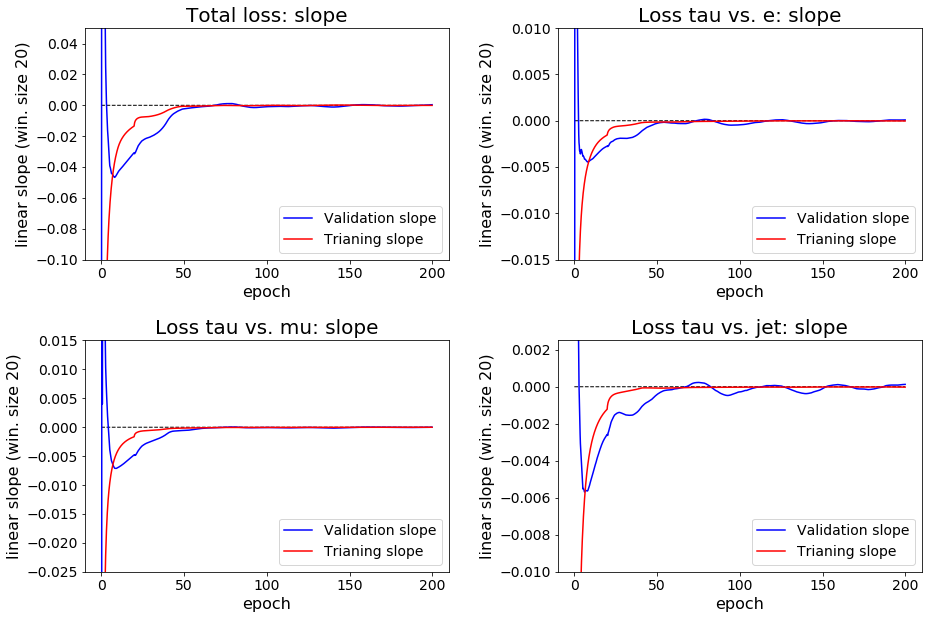

In [30]:
f, all_ax = plt.subplots(2, 2, figsize=(15,10))
y_ranges = [[-0.1, 0.05], [-0.015, 0.01], [-0.025, 0.015], [-0.01, 0.0025]]
i = 0
for loss in losses:
    loss_name = loss[0]
    loss_title = loss[1]
    j = int((i - (i % 2)) / 2)
    k = i % 2
    ax = all_ax[j][k]
    ax.plot(x_values, np.zeros(df.shape[0]), color="black", linewidth=1, ls="--")
    l1 = ax.plot(x_values, direction(df["val_" + loss_name], win_size), color="blue")
    l2 = ax.plot(x_values, direction(df[loss_name], win_size), color="red")
    
    lines = l1 + l2
    ax.legend(lines, ["Validation slope", "Trianing slope"], fontsize=14, loc='lower right')
    
    ax.set_title(loss_title + ": slope", fontsize=20)
    ax.set_ylabel("linear slope (win. size %d)" % (win_size / steps_per_epoch), fontsize=16)
    ax.set_xlabel("epoch", fontsize=16)
    ax.tick_params(labelsize=14)
    ax.set_ylim(y_ranges[i])
    
    i += 1
plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.show()
fig.savefig("Slops.pdf", bbox_inches='tight')

In [18]:
6e7/(10*(172+4))/1024

33.29190340909091

In [19]:
4*1e4*172

6880000.0

In [421]:
6e3

6000.0

In [423]:
(1e-5-1e-7)/(1e-7* 2*60000)

0.000825

In [443]:
arr = np.arange(90).reshape((30, 3))
np.random.shuffle(arr[0:10, :])
arr

array([[15, 16, 17],
       [12, 13, 14],
       [27, 28, 29],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [24, 25, 26],
       [ 0,  1,  2],
       [21, 22, 23],
       [ 9, 10, 11],
       [18, 19, 20],
       [30, 31, 32],
       [33, 34, 35],
       [36, 37, 38],
       [39, 40, 41],
       [42, 43, 44],
       [45, 46, 47],
       [48, 49, 50],
       [51, 52, 53],
       [54, 55, 56],
       [57, 58, 59],
       [60, 61, 62],
       [63, 64, 65],
       [66, 67, 68],
       [69, 70, 71],
       [72, 73, 74],
       [75, 76, 77],
       [78, 79, 80],
       [81, 82, 83],
       [84, 85, 86],
       [87, 88, 89]])

In [449]:
30*12/60

6.0

In [483]:
check = pandas.Series([1, 2, 3])

In [485]:
(check ** 2).sum()

14